In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
FILE_PATH=r"images\31EvJszFVfL.jpg"

In [8]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Update this path
text = pytesseract.image_to_string(FILE_PATH).strip()


In [9]:
text

'9.4in\n23cm'

#### Normally, the first glucon d image (able to display text)

Still our aim is to improve the image 

In [10]:
# TO display in jupyte
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

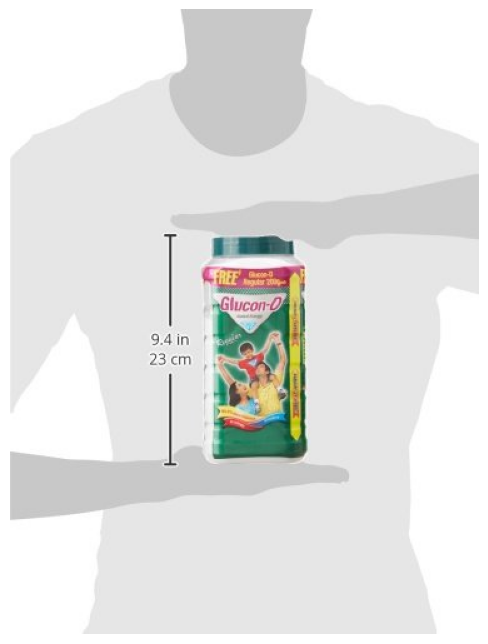

In [11]:
display(FILE_PATH)

- > Although saara text nhi pda usne, but its ok


In [12]:
img=cv2.imread(FILE_PATH)

In [13]:
inverted_image=cv2.bitwise_not(img)
cv2.imwrite("new-temp-image/inverted.jpg",inverted_image)


True

In [14]:
text = pytesseract.image_to_string(r"new-temp-image/inverted.jpg").strip()

In [20]:
def return_detected_text(file_path):
    return pytesseract.image_to_string(file_path).strip()

In [15]:
text
# we are still able to get same text

'9.4in\n23cm'

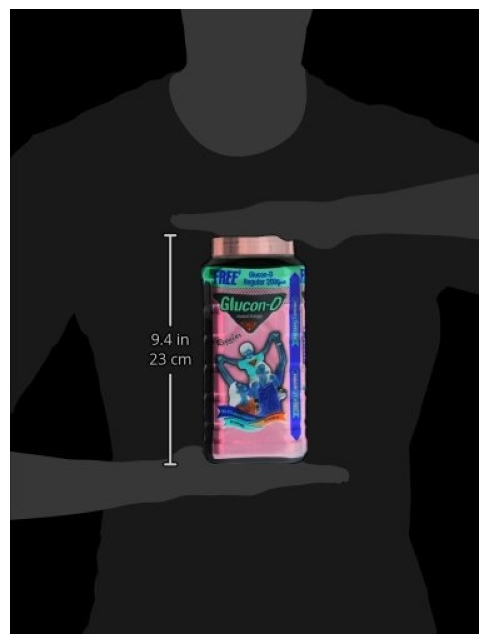

In [16]:
display("new-temp-image/inverted.jpg")

In [17]:
def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [18]:
gray_image=grayscale(img)
cv2.imwrite('new-temp-image/grayscale.jpg',gray_image)

True

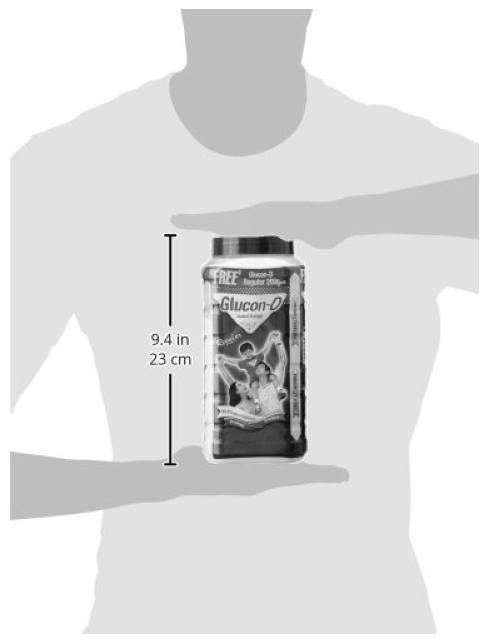

In [19]:
display('new-temp-image/grayscale.jpg')

In [21]:
# now lets se text detection possible or not
return_detected_text(file_path=r"new-temp-image/grayscale.jpg")


''

- > Grayscaling alone se text unable to read

In [24]:
norm_img = np.zeros((img.shape[0], img.shape[1]))
img2 = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)

In [26]:
cv2.imwrite("new-temp-image/norm.jpg",img2)

True

In [29]:
from PIL import Image
import tempfile

def set_image_dpi(file_path):

    im = Image.open(file_path)

    length_x, width_y = im.size

    factor = min(1, float(1024.0 / length_x))

    size = int(factor * length_x), int(factor * width_y)

    im_resized = im.resize(size, Image.LANCZOS)

    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix='.png')

    temp_filename = temp_file.name

    im_resized.save(temp_filename, dpi=(300, 300))

    return temp_filename

In [30]:
set_image_dpi(FILE_PATH)

'C:\\Users\\pooja\\AppData\\Local\\Temp\\tmp8k66f1mg.png'

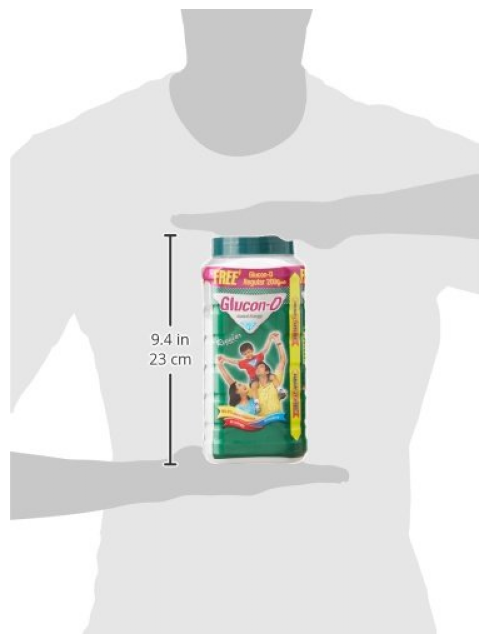

In [31]:
display(r'C:\\Users\\pooja\\AppData\\Local\\Temp\\tmp8k66f1mg.png')

In [32]:
def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)

In [55]:
thresh,im_bw=cv2.threshold(gray_image,200,235,cv2.THRESH_BINARY)
cv2.imwrite("new-temp-image/bw_image_2.jpg",im_bw)

True

In [57]:
return_detected_text(file_path=r'new-temp-image/bw_image_2.jpg')

''

In [58]:
def noise_removal(image):
    import numpy as np
    kernel=np.ones((1,1),np.uint8)
    image=cv2.dilate(image,kernel,iterations=1)
    kernel=np.ones((1,1),np.uint8)
    image=cv2.erode(image,kernel,iterations=1)
    image=cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
    image=cv2.medianBlur(image,3)
    return image


In [59]:
no_noise=noise_removal(im_bw)
cv2.imwrite("new-temp-image/nonoise.jpg",no_noise)

True

In [60]:
def thick_font(image):
    import numpy as np
    image=cv2.bitwise_not(image)
    kernel=np.ones((50,3),np.uint8)
    # iterations means same process kitni baar
    image=cv2.erode(image,kernel,iterations=1)
    # invert again to white bg
    image=cv2.bitwise_not(image)
    return image

In [61]:
dilated_image=thick_font(no_noise)

In [62]:
cv2.imwrite('new-temp-image/dilated_image.jpg',dilated_image)

True

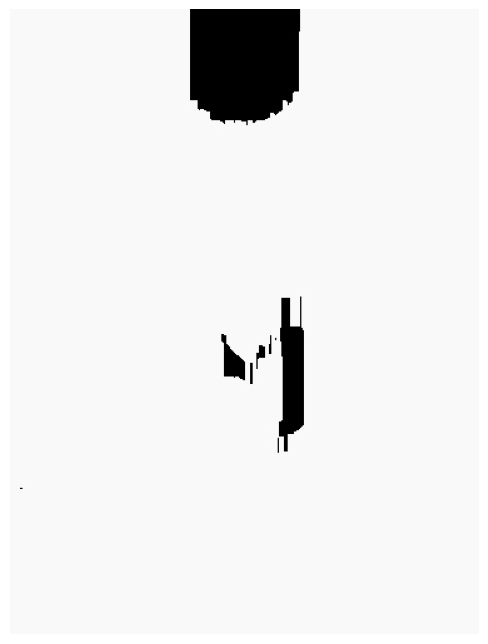

In [63]:
display("new-temp-image/dilated_image.jpg")

In [74]:
img_new=cv2.imread(r'images\612mrlqiI4L.jpg')

In [72]:
import easyocr
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(r'images\612mrlqiI4L.jpg')
result[0]

Using CPU. Note: This module is much faster with a GPU.
c:\Users\pooja\AppData\Local\Programs\Python\Python311\Lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to th

([[555, 389], [569, 389], [569, 411], [555, 411]], '3', 0.6094268303133141)

In [73]:
pd.DataFrame(result, columns=['bbox', 'text', 'conf'])

,bbox,text,conf
0,"[[555, 389], [569, 389], [569, 411], [555, 411]]",3,0.609427
1,"[[595, 389], [611, 389], [611, 411], [595, 411]]",3,0.869789
2,"[[666, 370], [683, 370], [683, 441], [666, 441]]",1,0.642571
3,"[[727, 377], [741, 377], [741, 475], [727, 475]]",1,0.482357
4,"[[359, 510], [395, 510], [395, 579], [359, 579]]",F,0.219179
5,"[[389, 517], [521, 517], [521, 557], [389, 557]]",IW!,0.060004
6,"[[555, 517], [567, 517], [567, 563], [555, 563]]",1,0.622614
7,"[[566, 524], [624, 524], [624, 550], [566, 550]]",5833,0.313459
8,"[[667, 499], [681, 499], [681, 583], [667, 583]]",1,0.361899
9,"[[681, 531], [695, 531], [695, 555], [681, 555]]",3,0.389797


In [98]:
rotated_image = cv2.rotate(img_new, cv2.ROTATE_90_CLOCKWISE)
# rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
# rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
# rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
# rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
# rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
# rotated_image = cv2.rotate(rotated_image, cv2.ROTATE_90_CLOCKWISE)
cv2.imwrite("temp/newsome.jpg",rotated_image)


True

In [99]:
import easyocr
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(r'temp/newsome.jpg')
result[0]

Using CPU. Note: This module is much faster with a GPU.
c:\Users\pooja\AppData\Local\Programs\Python\Python311\Lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to th

([[159, 331], [237, 331], [237, 345], [159, 345]],
 'cohposition',
 0.27189238871952237)

In [100]:
pd.DataFrame(result, columns=['bbox', 'text', 'conf'])

,bbox,text,conf
0,"[[159, 331], [237, 331], [237, 345], [159, 345]]",cohposition,0.271892
1,"[[157, 347], [231, 347], [231, 361], [157, 361]]",Serving Size:,0.667582
2,"[[239, 347], [323, 347], [323, 363], [239, 363]]",Tablet (0.709 g1,0.625424
3,"[[329, 347], [537, 347], [537, 361], [329, 361]]",Each serving contains (Approx. Valuesh:,0.705247
4,"[[156, 361], [211, 361], [211, 380], [156, 380]]",Ingredient,0.780910
...,...,...,...
66,"[[471, 727], [661, 727], [661, 741], [471, 741]]",pregnant nursing; taking any medicabon,0.425044
67,"[[671, 727], [707, 727], [707, 741], [671, 741]]",having,0.995157
68,"[[165, 741], [251, 741], [251, 753], [165, 753]]",medical condition,0.830400
69,"[[179.21913119055696, 450.37530495244556], [20...",amla,0.850430


In [101]:
#https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df
import numpy as np

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    print("angle",angle)
    return rotateImage(cvImage, -1.0 * angle)